<img src="AW&H2015.png" style="float: left">

<img src="flopylogo.png" style="float: center">

# History match the Freyberg model using a two parameters ``K`` and ``R`` using head and flux observations

#### Where are we on the Goldilocks complexity curve? 

<img src="Hunt1998_sweetspot.png" style="float: center">



The runs so far were intended to be greatly oversimplified so as to be a starting point for adding complexity. However, when we added just __*one more parameter*__ for a total of 2 parameters some uncerainty for some forecasts got appreciably __worse__.  And these parameters cover the entire model domain, which is unrealistic for the natural world!  Are we past the "sweetspot" and should avoid any additional complexity even if our model looks nothing like reality?  

Adding parameters in and of itself is not problematic.  Rather, it is adding parameters that influence forecasts but are unconstrained by observations so that they are free to wiggle and ripple uncertainty to our forcasts.  If observations are added that help constrain the parameters, the forecast observation will be more certain. That is, the natural flip side of adding parameters is constraining them, with data (first line of defense) or soft-knowledge and problem dimension reduciton (SVD).  

Anderson et al. (2015) suggest that at a minimum groundwater models be history matched to heads and fluxes.  There is a flux observation in our PEST control file, but it was given zero weight.  Let's see what happens if we move our model to the minimum calibration of Anderson et al.

#### Objectives for this notebook are to:

1) Add a flux observation to the measurement objective function of our Freyberg model

2) Explore the effect of adding the observation to history matching, parameter uncertainty, and forecast uncertainty

In [4]:
%matplotlib inline
import os
import sys
sys.path.append("..")
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import pyemu

In [5]:
import freyberg_setup as fs
pst_name = fs.PST_NAME_KR
working_dir = fs.WORKING_DIR_KR
fs.setup_pest_kr()
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.control_data.noptmax = 0
pst.write(os.path.join(working_dir,pst_name))

['.DS_Store', 'botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'kzone.ref', 'mpath.in', 'potobs_group.csv', 'Process_output.py', 'really_noisy_heads.txt', 'run_true_model.py', 'strt.ref', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_kr
FloPy is using the following executable to run the model: /Users/jwhite/Dev/GW1876/activities/freyberg_k_and_r_fluxobs/freyberg_kr/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S

In [6]:
pyemu.helpers.run("pestpp {0}".format(pst_name),cwd=working_dir)

run():pestpp freyberg_kr.pst


``PEST++`` only ran the model one time - why?

In [11]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.observation_data

,obsnme,obsval,weight,obgnme
obsnme,,,,
flx_constan_19700102,flx_constan_19700102,-4.073839e+02,0.0,flx_constan
flx_in-out_19700102,flx_in-out_19700102,-1.373190e+01,0.0,flx_in-out
flx_percent_19700102,flx_percent_19700102,-2.200000e-01,0.0,flx_percent
flx_recharg_19700102,flx_recharg_19700102,6.004800e+03,0.0,flx_recharg
flx_river_l_19700102,flx_river_l_19700102,-3.706027e+03,0.0,calflux
flx_storage_19700102,flx_storage_19700102,0.000000e+00,0.0,flx_storage
flx_total_19700102,flx_total_19700102,-1.373193e+01,0.0,flx_total
flx_wells_19700102,flx_wells_19700102,-1.905120e+03,0.0,flx_wells
flx_constan_19750101,flx_constan_19750101,-1.796678e+02,0.0,flx_constan


Wow!  that's a lot of observations.  Why so many?  Answer:  we are "carrying" lots of model outputs that may be of interest to us later (not just places and times where we have actual measurements).  These outputs include forecasts as well as "potential" observation locations we will use in dataworth analysis (more on that later)

In [12]:
pst.observation_data.loc[pst.nnz_obs_names,:]

,obsnme,obsval,weight,obgnme
obsnme,,,,
cr03c16_19700102,cr03c16_19700102,18.864677,5.0,calhead
cr03c10_19700102,cr03c10_19700102,20.920237,5.0,calhead
cr04c9_19700102,cr04c9_19700102,23.287189,5.0,calhead
cr10c2_19700102,cr10c2_19700102,28.141190,5.0,calhead
cr14c11_19700102,cr14c11_19700102,20.524639,5.0,calhead
cr16c17_19700102,cr16c17_19700102,15.522017,5.0,calhead
cr22c11_19700102,cr22c11_19700102,19.704904,5.0,calhead
cr23c16_19700102,cr23c16_19700102,15.644862,5.0,calhead
cr25c5_19700102,cr25c5_19700102,21.413268,5.0,calhead


Let's give the observation ``rivflux_cal`` a non-zero weight

In [13]:
obs = pst.observation_data
obs.loc[obs.obgnme=="calflux","weight"] = 0.01 #super subjective
pst.observation_data.loc[pst.nnz_obs_names,:]

,obsnme,obsval,weight,obgnme
obsnme,,,,
flx_river_l_19700102,flx_river_l_19700102,-3706.027000,0.01,calflux
cr03c16_19700102,cr03c16_19700102,18.864677,5.00,calhead
cr03c10_19700102,cr03c10_19700102,20.920237,5.00,calhead
cr04c9_19700102,cr04c9_19700102,23.287189,5.00,calhead
cr10c2_19700102,cr10c2_19700102,28.141190,5.00,calhead
cr14c11_19700102,cr14c11_19700102,20.524639,5.00,calhead
cr16c17_19700102,cr16c17_19700102,15.522017,5.00,calhead
cr22c11_19700102,cr22c11_19700102,19.704904,5.00,calhead
cr23c16_19700102,cr23c16_19700102,15.644862,5.00,calhead


### Now let's change NOPTMAX from 0 to 20 so we can see what the effect of weighting the flux target is

In [14]:
pst.control_data.noptmax = 20
pst.write(os.path.join(working_dir,pst_name))

### And we'll run the model - look at the terminal window where you launched this notebook to see the progress of PEST++.  Advance through the code blocks when you see a 0 returned.

In [15]:
pyemu.helpers.run("pestpp {0}".format(pst_name),cwd=working_dir)

run():pestpp freyberg_kr.pst


Let's explore the results

In [17]:
df_obj = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".iobj")),index_col=0)
df_obj

,model_runs_completed,total_phi,measurement_phi,regularization_phi,flx_total,vol_recharg,flx_storage,vol_wells,vol_constan,forehead,...,flx_wells,flx_river_l,foretrav,calhead,foreflux,vol_storage,pothead,vol_percent,flx_in-out,flx_recharg
iteration,,,,,,,,,,,,,,,,,,,,,
0,0,1208.470,1208.470,0,0,0,0,0,0,0,...,0,0,0,1207.910,0,0,0,0,0,0
1,8,744.662,744.662,0,0,0,0,0,0,0,...,0,0,0,743.256,0,0,0,0,0,0
2,15,740.446,740.446,0,0,0,0,0,0,0,...,0,0,0,738.898,0,0,0,0,0,0
3,23,740.445,740.445,0,0,0,0,0,0,0,...,0,0,0,738.895,0,0,0,0,0,0


## Egads!  Our Phi is YUGE!  Oh wait, we added a new observation, so we can't compare it to what we had with only head observations.


#### Okay, what did it do to our parameter uncertainty?

In [19]:
df_paru = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".par.usum.csv")),index_col=0)
df_paru

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
name,,,,,,,,
HK,0.69897,0.5,-0.30103,1.69897,0.840648,0.053446,0.733756,0.94754


# Hold the phone - only K is showing here.  Did you run PESTCHEK before burning the silicon? 

 (Remember last notebook where we said:  "Let's run PESTCHEK and see what it says about our freyberg.pst file"?)

In [20]:
pyemu.helpers.run("pestchek {0}".format(pst_name),cwd=working_dir)

run():pestchek freyberg_kr.pst


#### Well the instructors gave you the same PEST control file as last exerisce!  Some one should tell them that it was "curious" in the last notebook but vexxing now, because we again see that in the PESTCHEK warning section it says "All parameters belonging to the parameter group "rch" are either fixed or tied". That is flagged as a warning because PESTCHEK is wondering (with good reason in this case) why would it not be adjustable after you went to all the trouble to define it as a parameter.  But, there  are times you may want to do this, so it is classified as a warning and isn't going to stop you.

#### But that is not what we want, we want to make recharge a parameter in this activity and redo our work (did we remember to mention the importance of running PESTCHEK?)

### Open the PEST control file freyberg.pst in your text editor.  

1) Look in the parameter data section

2) Find the parameter __rch_0__ (the recharge for the calibration period) and make it adjustable (hint:  look at the other parameters) 

3) Save the file

4) Run PESTCHEK on the PEST control file in a seperate terminal window or by executing the next code block and looking at the terminal window where you launched this notebook

In [21]:
pst.parameter_data.loc["rch_0",'partrans'] = "none"
pst.write(os.path.join(working_dir,pst_name))

In [22]:
pyemu.helpers.run("pestchek {0}".format(pst_name),cwd=working_dir)

run():pestchek freyberg_kr.pst


### Now to redo our steps from above....look at the terminal window where you launched this notebook to see the progress of PEST++.  Advance through the code blocks when you see a 0 returned.

In [23]:
pyemu.helpers.run("pestpp {0}".format(pst_name),cwd=working_dir)

run():pestpp freyberg_kr.pst


### Again, let's look at results

In [24]:
df_obj = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".iobj")),index_col=0)
df_obj

,model_runs_completed,total_phi,measurement_phi,regularization_phi,flx_total,vol_recharg,flx_storage,vol_wells,vol_constan,forehead,...,flx_wells,flx_river_l,foretrav,calhead,foreflux,vol_storage,pothead,vol_percent,flx_in-out,flx_recharg
iteration,,,,,,,,,,,,,,,,,,,,,
0,0,1208.470,1208.470,0,0,0,0,0,0,0,...,0,0,0,1207.910,0,0,0,0,0,0
1,9,744.636,744.636,0,0,0,0,0,0,0,...,0,0,0,738.743,0,0,0,0,0,0
2,17,740.144,740.144,0,0,0,0,0,0,0,...,0,0,0,736.913,0,0,0,0,0,0
3,27,740.143,740.143,0,0,0,0,0,0,0,...,0,0,0,737.031,0,0,0,0,0,0


### not much change in phi, we what's the point?

In [25]:
df_paru = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".par.usum.csv")),index_col=0)
df_paru

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
name,,,,,,,,
RCH_0,1.00000,0.125,0.75000,1.25000,1.009050,0.030145,0.948758,1.06934
HK,0.69897,0.500,-0.30103,1.69897,0.844742,0.054169,0.736405,0.95308


### Much better - thanks PESTCHEK.  Now let's compare the parameter uncertainty results with the flux observation above to the previous run where we zero weighted the flux observation below:

In [27]:
df_paru_base = pd.read_csv(os.path.join("..","freyberg_k_and_r",
                                        working_dir,pst_name.replace(".pst",".par.usum.csv")),index_col=0)
df_paru_base

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
name,,,,,,,,
RCH_0,1.00000,0.125,0.75000,1.25000,1.250000,0.124125,1.001750,1.49825
HK,0.69897,0.500,-0.30103,1.69897,0.945987,0.070462,0.805064,1.08691



###  Here's the parameter uncertainty for the K and R parameters, side by side, heads+flux observation vs heads only

In [28]:
df_paru_concat = pd.concat([df_paru,df_paru_base],join="outer",axis=1,keys=["heads+fluxobs","heads_only"])
df_paru_concat

heads+fluxobs                                                            \
         prior_mean prior_stdev prior_lower_bound prior_upper_bound post_mean   
name                                                                            
RCH_0       1.00000       0.125           0.75000           1.25000  1.009050   
HK          0.69897       0.500          -0.30103           1.69897  0.844742   

                                                   heads_only              \
      post_stdev post_lower_bound post_upper_bound prior_mean prior_stdev   
name                                                                        
RCH_0   0.030145         0.948758          1.06934    1.00000       0.125   
HK      0.054169         0.736405          0.95308    0.69897       0.500   

                                                                \
      prior_lower_bound prior_upper_bound post_mean post_stdev   
name                                                             
RCH_0           0.75000           1.25000  1.250000   0.124125   
HK             -0.30103           1.69897  0.945987   0.070462   

                                         
      post_lower_bound post_upper_bound  
name                                     
RCH_0         1.001750          1.49825  
HK            0.805064          1.08691

Interesting - a tradeoff with fit between the two types of observations...


###  Let's plot these up like before.  Here's the prior and posterior standard deviations


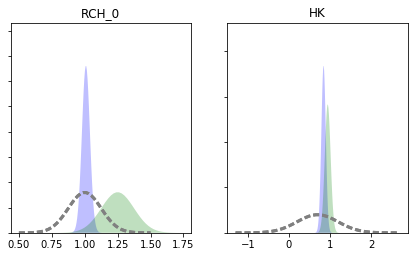

In [32]:
figs,axes = pyemu.helpers.plot_summary_distributions(df_paru,subplots=True)
for pname,ax in zip(pst.adj_par_names,axes):
    pyemu.helpers.plot_summary_distributions(df_paru_base.loc[[pname.upper()],:],ax=ax,pt_color="g")

From an uncertainty standpoint, the flux observation has helped us learn a lot about recharge


### Let's look at our forecasts - here's the K and R model with the flux observations:

In [34]:
df_foreu = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".pred.usum.csv")),index_col=0)
df_foreu.loc[:,"reduction"] = 100.0 *  (1.0 - (df_foreu.post_stdev / df_foreu.prior_stdev))

df_foreu

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound,reduction
name,,,,,,,,,
FLX_RIVER_L_19750102,-1436.1400,214.356000,-1864.8600,-1007.4300,-1489.1900,23.222800,-1535.6400,-1442.7400,89.166247
FR01C13_19750102,20.5560,0.757354,19.0413,22.0707,20.2982,0.082050,20.1341,20.4623,89.166255
FR02C02_19750102,27.1473,5.777200,15.5929,38.7017,25.2693,0.625888,24.0175,26.5211,89.166240
FR03C10_19750102,22.0427,2.420370,17.2019,26.8834,21.2271,0.262217,20.7027,21.7516,89.166243
FR03C16_19750102,19.6050,0.307548,18.9899,20.2201,19.4992,0.033319,19.4326,19.5659,89.166276
FR04C9_19750102,22.4907,2.871010,16.7487,28.2327,21.5274,0.311039,20.9054,22.1495,89.166217
FR09C15_19750102,17.0955,1.032670,15.0302,19.1609,17.4540,0.111877,17.2302,17.6777,89.166239
FR10C2_19750102,28.4562,7.043230,14.3698,42.5427,26.1887,0.763047,24.6626,27.7148,89.166235
FR14C11_19750102,17.7482,0.649995,16.4482,19.0482,17.5243,0.070419,17.3835,17.6652,89.166255


### Compare these results with the ``k_and_r`` model *without* the flux observation (below):

In [35]:
df_foreu_base = pd.read_csv(os.path.join("..","freyberg_k_and_r",
                                         working_dir,pst_name.replace(".pst",".pred.usum.csv")),index_col=0)
df_foreu_base.loc[:,"reduction"] = 100.0 *  (1.0 - (df_foreu_base.post_stdev / df_foreu_base.prior_stdev))
df_foreu_base

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound,reduction
name,,,,,,,,,
FLX_RIVER_L_19750102,-1436.1400,270.459000,-1977.0600,-895.2260,-1538.0500,38.116800,-1614.2800,-1461.8200,85.906625
FR01C13_19750102,20.5560,0.613730,19.3285,21.7834,20.1598,0.086489,19.9869,20.3328,85.907663
FR02C02_19750102,27.1473,4.961560,17.2242,37.0704,24.1837,0.699227,22.7852,25.5822,85.907114
FR03C10_19750102,22.0427,1.978460,18.0858,25.9996,20.7831,0.278808,20.2254,21.3407,85.907827
FR03C16_19750102,19.6050,0.246907,19.1112,20.0988,19.4428,0.034795,19.3732,19.5124,85.907690
FR04C9_19750102,22.4907,2.358680,17.7734,27.2081,20.9994,0.332399,20.3346,21.6642,85.907414
FR09C15_19750102,17.0955,0.812431,15.4707,18.7204,17.6400,0.114490,17.4110,17.8690,85.907726
FR10C2_19750102,28.4562,6.142620,16.1710,40.7415,24.8556,0.865673,23.1243,26.5869,85.907105
FR14C11_19750102,17.7482,0.518011,16.7122,18.7842,17.4067,0.073000,17.2607,17.5527,85.907693


### And here the forecast uncertianties are side by side

In [37]:
df_foreu_concat = pd.concat([df_foreu,df_foreu_base],join="outer",axis=1,keys=["heads+fluxobs","heads_only"])
df_foreu_concat

heads+fluxobs                                  \
                        prior_mean   prior_stdev prior_lower_bound   
name                                                                 
FLX_RIVER_L_19750102    -1436.1400    214.356000        -1864.8600   
FR01C13_19750102           20.5560      0.757354           19.0413   
FR02C02_19750102           27.1473      5.777200           15.5929   
FR03C10_19750102           22.0427      2.420370           17.2019   
FR03C16_19750102           19.6050      0.307548           18.9899   
FR04C9_19750102            22.4907      2.871010           16.7487   
FR09C15_19750102           17.0955      1.032670           15.0302   
FR10C2_19750102            28.4562      7.043230           14.3698   
FR14C11_19750102           17.7482      0.649995           16.4482   
FR16C17_19750102           17.2635      0.608892           16.0457   
FR22C11_19750102           16.6192      1.146240           14.3267   
FR23C16_19750102           15.6226      0.563014           14.4966   
FR25C10_19750102           16.7860      1.675750           13.4345   
FR25C5_19750102            20.4690      4.065560           12.3379   
FR27C7_19750102            18.5070      2.975600           12.5558   
FR30C16_19750102           14.1212      0.589439           12.9423   
FR34C8_19750102            15.9855      1.401770           13.1819   
FR35C11_19750102           13.6223      0.212414           13.1975   
TRAVEL_TIME             27691.0000  19523.400000       -11355.9000   

                                                                 \
                     prior_upper_bound   post_mean   post_stdev   
name                                                              
FLX_RIVER_L_19750102        -1007.4300  -1489.1900    23.222800   
FR01C13_19750102               22.0707     20.2982     0.082050   
FR02C02_19750102               38.7017     25.2693     0.625888   
FR03C10_19750102               26.8834     21.2271     0.262217   
FR03C16_19750102               20.2201     19.4992     0.033319   
FR04C9_19750102                28.2327     21.5274     0.311039   
FR09C15_19750102               19.1609     17.4540     0.111877   
FR10C2_19750102                42.5427     26.1887     0.763047   
FR14C11_19750102               19.0482     17.5243     0.070419   
FR16C17_19750102               18.4813     17.0538     0.065966   
FR22C11_19750102               18.9117     16.2290     0.124181   
FR23C16_19750102               16.7486     15.4293     0.060996   
FR25C10_19750102               20.1375     16.2209     0.181546   
FR25C5_19750102                28.6001     19.1348     0.440453   
FR27C7_19750102                24.4582     17.5189     0.322370   
FR30C16_19750102               15.3001     13.9187     0.063858   
FR34C8_19750102                18.7890     15.5111     0.151864   
FR35C11_19750102               14.0471     13.5489     0.023012   
TRAVEL_TIME                 66737.8000  21007.3000  2115.120000   

                                                                   heads_only  \
                     post_lower_bound post_upper_bound  reduction  prior_mean   
name                                                                            
FLX_RIVER_L_19750102       -1535.6400       -1442.7400  89.166247  -1436.1400   
FR01C13_19750102              20.1341          20.4623  89.166255     20.5560   
FR02C02_19750102              24.0175          26.5211  89.166240     27.1473   
FR03C10_19750102              20.7027          21.7516  89.166243     22.0427   
FR03C16_19750102              19.4326          19.5659  89.166276     19.6050   
FR04C9_19750102               20.9054          22.1495  89.166217     22.4907   
FR09C15_19750102              17.2302          17.6777  89.166239     17.0955   
FR10C2_19750102               24.6626          27.7148  89.166235     28.4562   
FR14C11_19750102              17.3835          17.6652  89.166255     17.7482   
FR16C17_19750102              16.

### and plotted

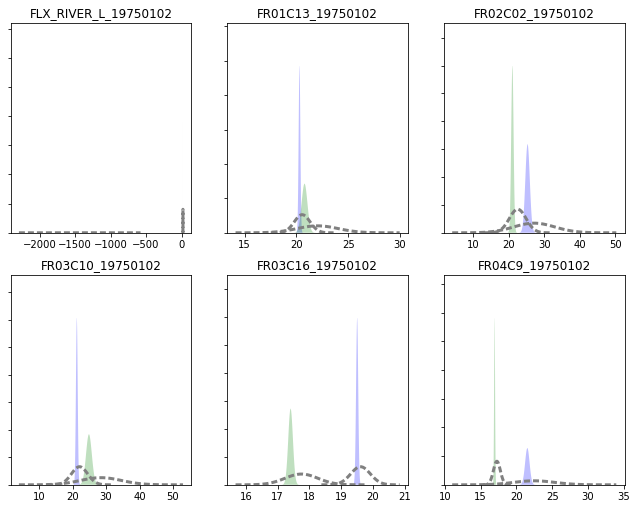

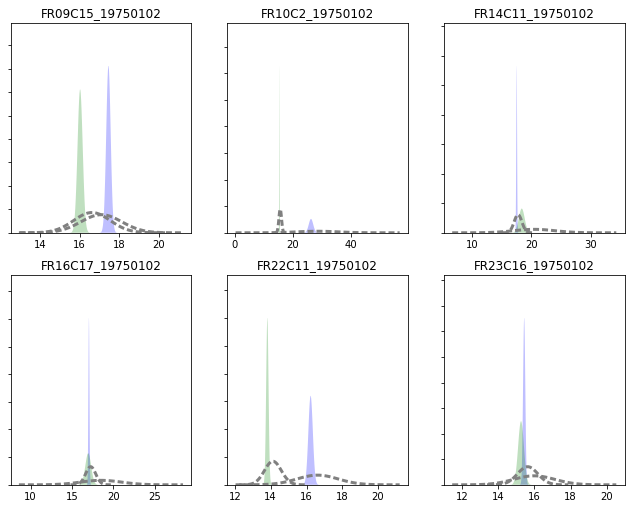

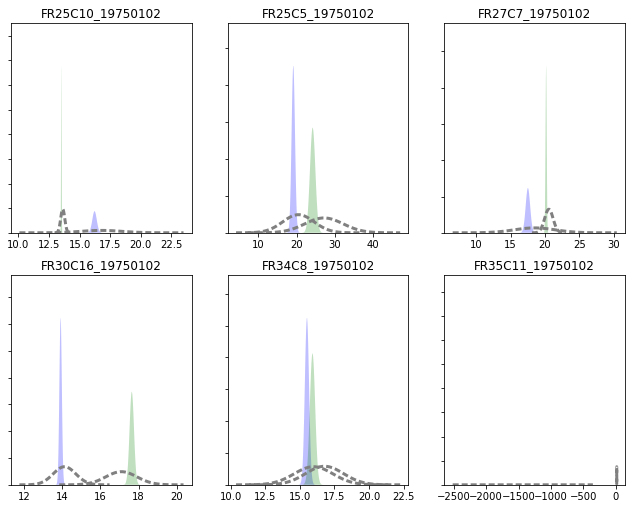

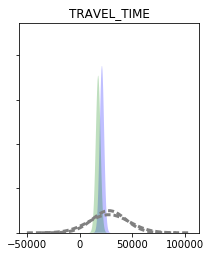

In [40]:
figs, axes = pyemu.helpers.plot_summary_distributions(df_foreu,subplots=True)
for fname,ax in zip(pst.forecast_names,axes):
    pyemu.helpers.plot_summary_distributions(df_foreu_base.loc[[fname.upper()],:],ax=ax,pt_color="g")
    

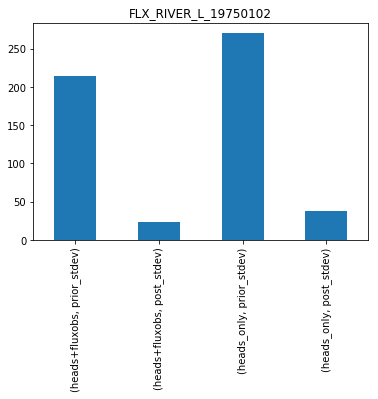

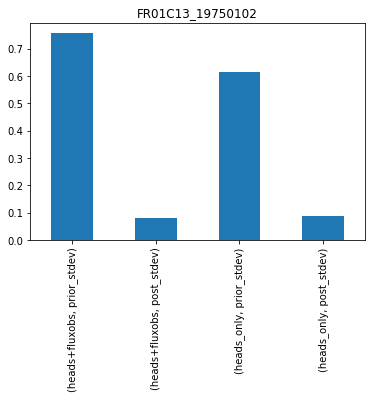

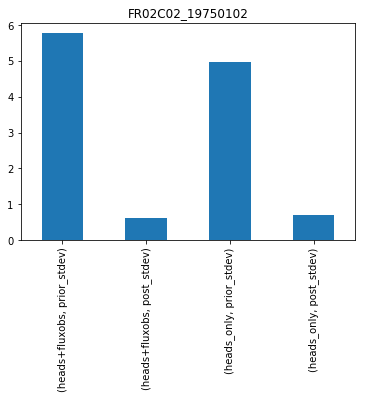

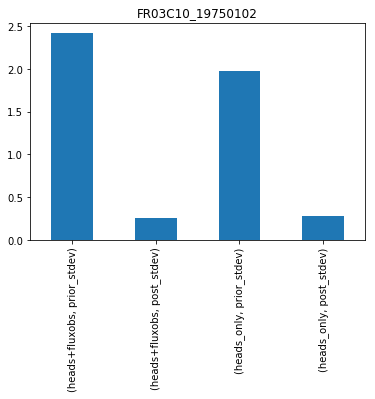

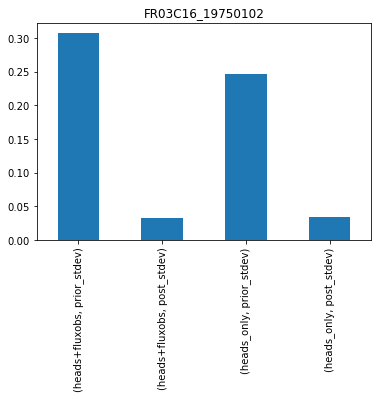

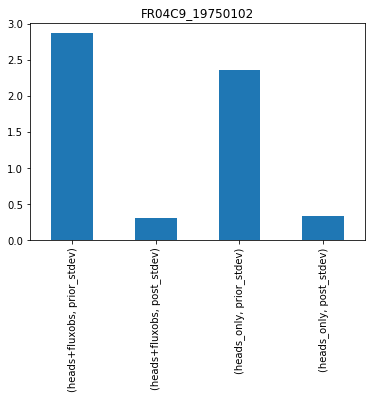

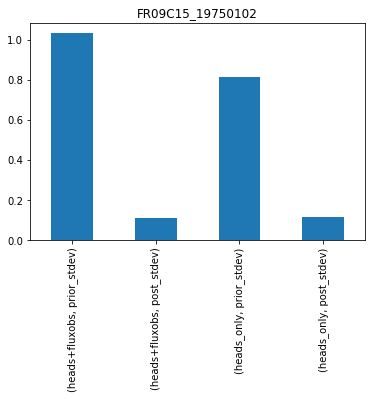

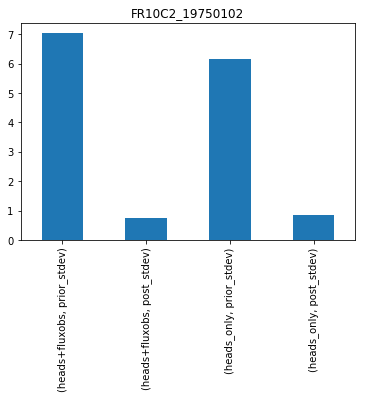

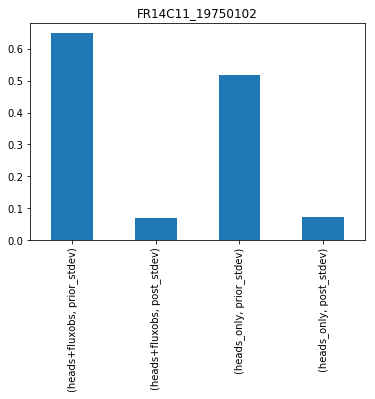

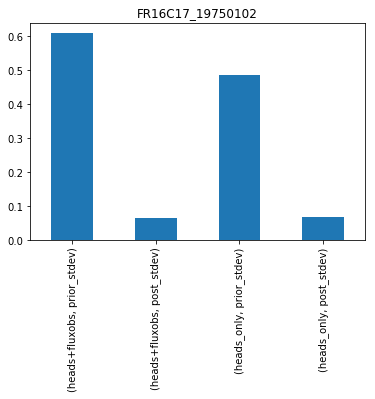

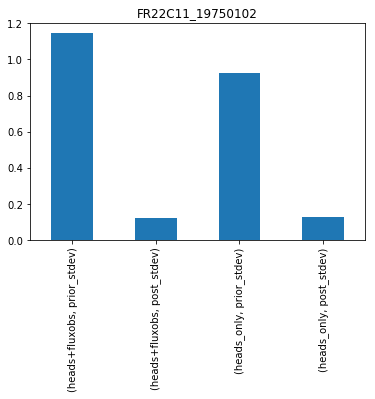

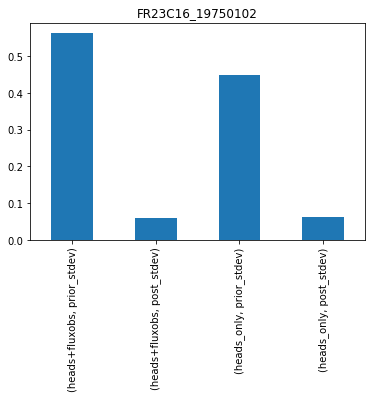

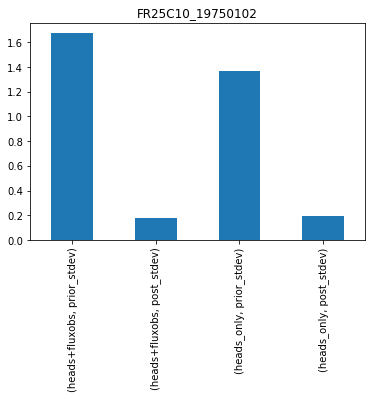

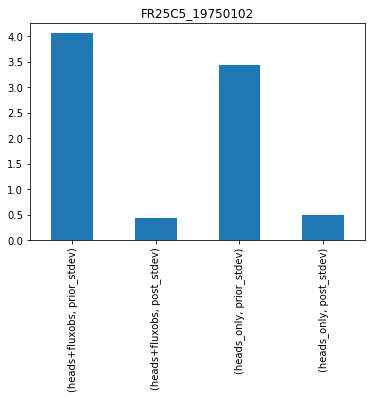

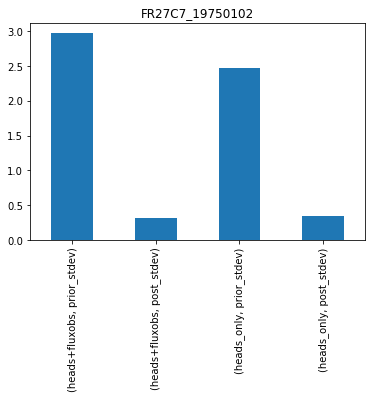

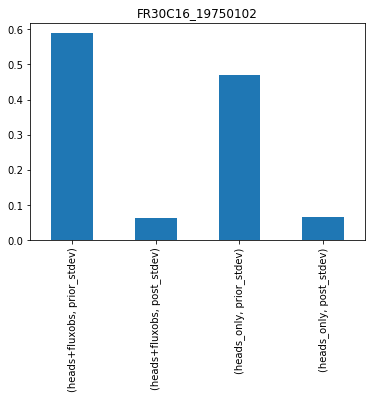

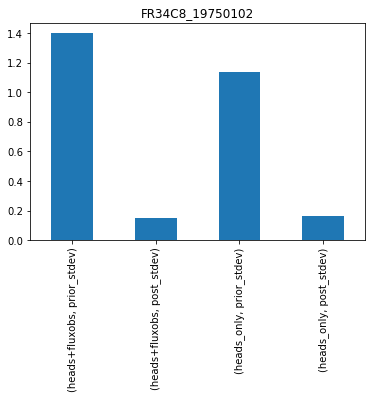

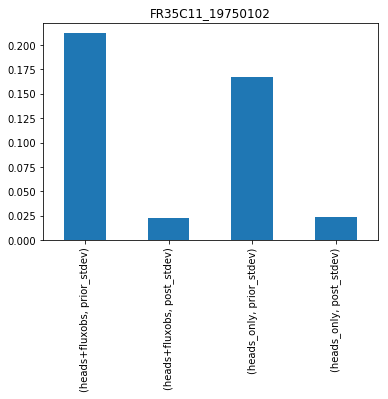

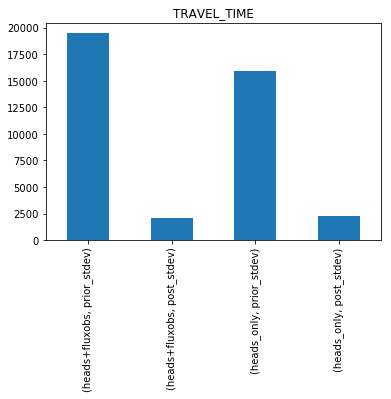

In [46]:
for forecast in df_foreu_concat.index:
    df_foreu_concat.loc[forecast,(slice(None),("prior_stdev","post_stdev"))].plot(kind="bar",subplots=True)
    plt.show()

### The information in the flux obs has reduced river flux forecast uncertainty dramatically, but has not really helped with ``travel_time`` or heads.  So on first blush we see that the same model/observation data set can make some forecasts better but not others

### But there is more to it than that - think about which observation helped which parameter and which forecast the most.  Is there an "birds of the feather" type of thing going on?  
